Deep Learning Homework 1

Problem 1 - Practice the computation of KNN


In [21]:
import pandas as pd
import numpy as np

In [22]:
#CREATING DATAFRAME
info = {'x' : [0,0,1,1,1,2,1,2,-1,0,0,-1],
        'y' : [1,1,2,2,2,2,2,2,-1,-1,-1,-2],
        'z' : [0,1,1,0,2,2,-1,3,-1,-2,-1,1],
        'class' : ['a','a','a','a','b','b','b','b','c','c','c','c'] }
#make a pandas table
df = pd.DataFrame(info)
#print(df)

inputs = df[['x','y','z']]
output = df['class'].values
print(inputs)
print(output)


    x  y  z
0   0  1  0
1   0  1  1
2   1  2  1
3   1  2  0
4   1  2  2
5   2  2  2
6   1  2 -1
7   2  2  3
8  -1 -1 -1
9   0 -1 -2
10  0 -1 -1
11 -1 -2  1
['a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c']


In [23]:
#building model
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier(n_neighbors=1, p =2).fit(inputs,output)
knn_2 = KNeighborsClassifier(n_neighbors=2, p=2).fit(inputs,output)
knn_3 = KNeighborsClassifier(n_neighbors=3, p=2).fit(inputs,output)

In [24]:
#testing data point
test_data = {'x' : [1],
             'y' : [0],
             'z' : [1],
            }
#point into datafram
test_df = pd.DataFrame(test_data)
print(test_df)

#k=1 output
output_1 = knn_1.predict(test_df)
print("Output class k=1 : ", output_1)
#k=2 output
output_2 = knn_2.predict(test_df)
print("Output class k=2 : ", output_2)
#k=3 output
output_3 = knn_3.predict(test_df)
print("Output class k=3 : ", output_3)

   x  y  z
0  1  0  1
Output class k=1 :  ['a']
Output class k=2 :  ['a']
Output class k=3 :  ['a']


Problem 2 - KNN for Simple Data

In [25]:
#load in data
x_y= np.load("knn_minitrain.npy")
labels = np.load("knn_minitrain_label.npy")
#im too good...
x = x_y[:,0]
y = x_y[:,1]
data = { 'x' : x,
         'y' : y,
        'label' : labels}
#making of dataframe:
df_ktrain = pd.DataFrame(data)
df_input = df_ktrain[['x','y']]
df_output = df_ktrain['label']

print(x_y.shape)

(40, 2)


In [26]:
#We Will now make a KNN model. 
from sklearn.neighbors import KNeighborsClassifier

#p=2 is l2 distance (euclidean)
#Common practice is to set k = sqrt(n) --> sqrt(40) ~ 6
kclassifier = KNeighborsClassifier(n_neighbors=6, p = 2).fit(df_input,df_output)

In [27]:
#Generate Random Points
import random
#generating a sequence of random numbers
x_test = random.sample(range(0,20),10)
y_test = random.sample(range(0,20),10)

data_test = { 'x' : x_test, 'y' : y_test}
data_df_test = pd.DataFrame(data_test)

test_output = kclassifier.predict(data_df_test)
print(test_output)

[1 0 0 0 2 1 2 3 3 1]


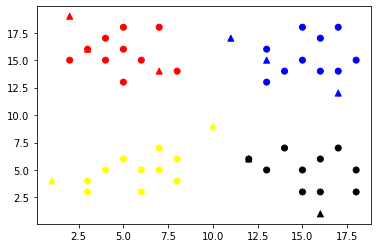

In [31]:
#Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
colors = ["red", "blue", "yellow", "black"]
colormap = pltc.ListedColormap(colors)
plt.scatter(x_test,y_test, c = test_output, cmap =colormap, marker = '^')
plt.scatter(x,y, c =labels, cmap = colormap)